**Questão 1**

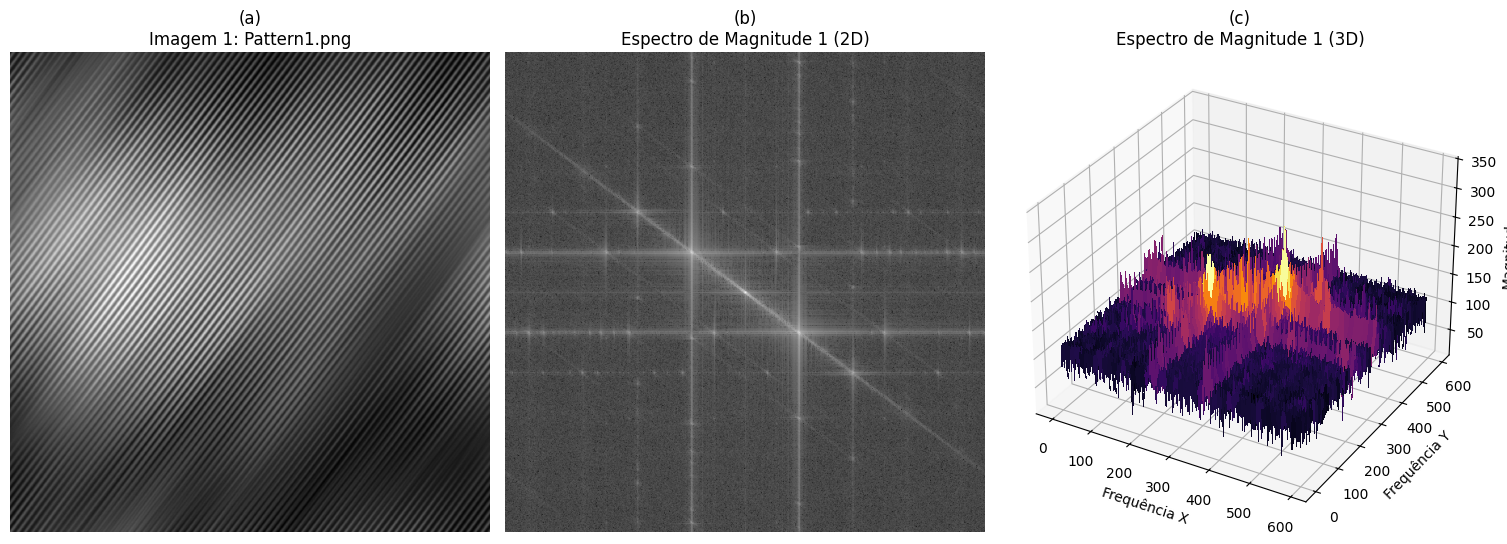

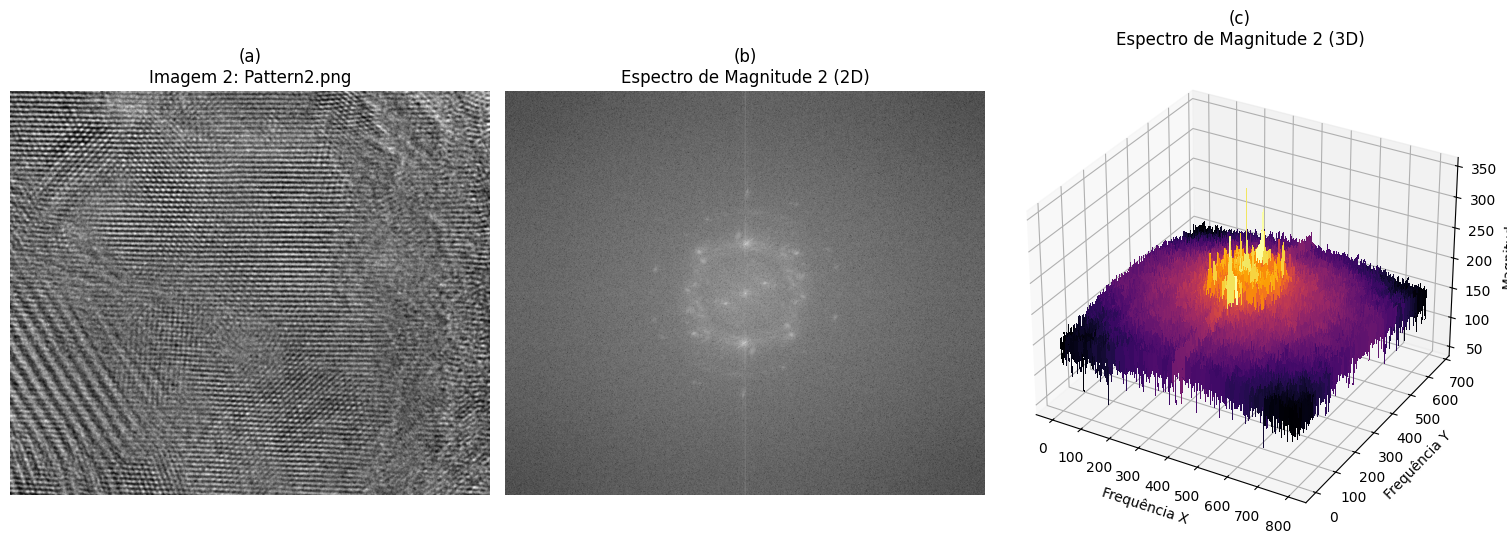

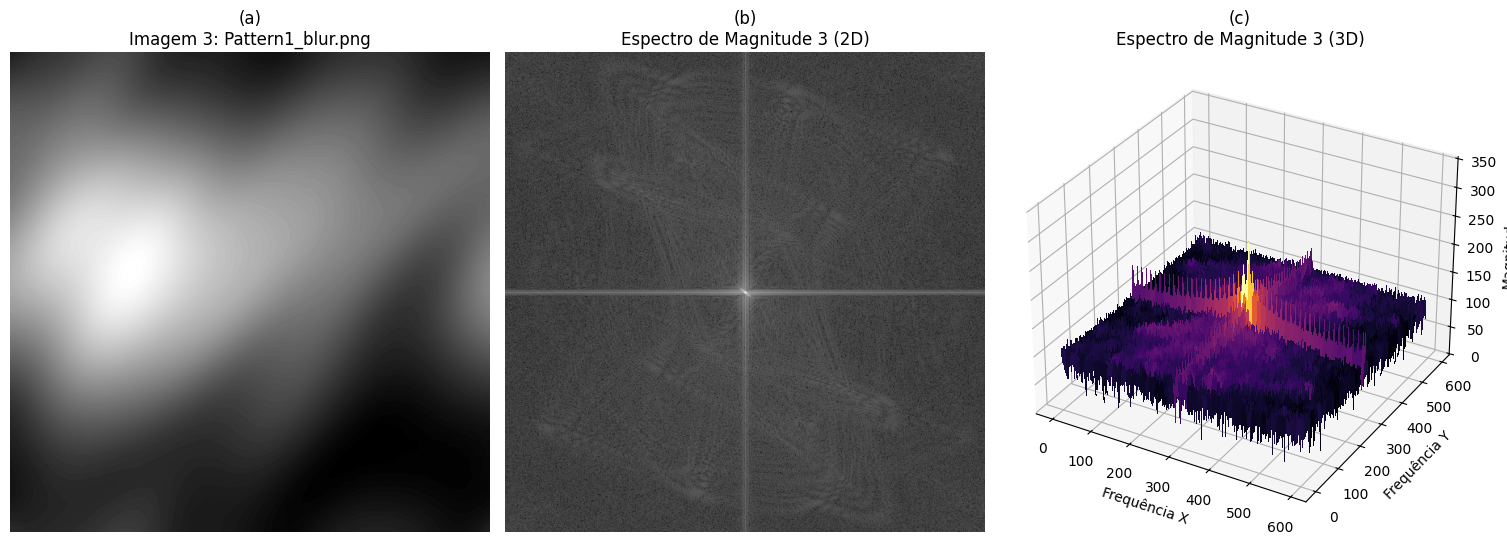

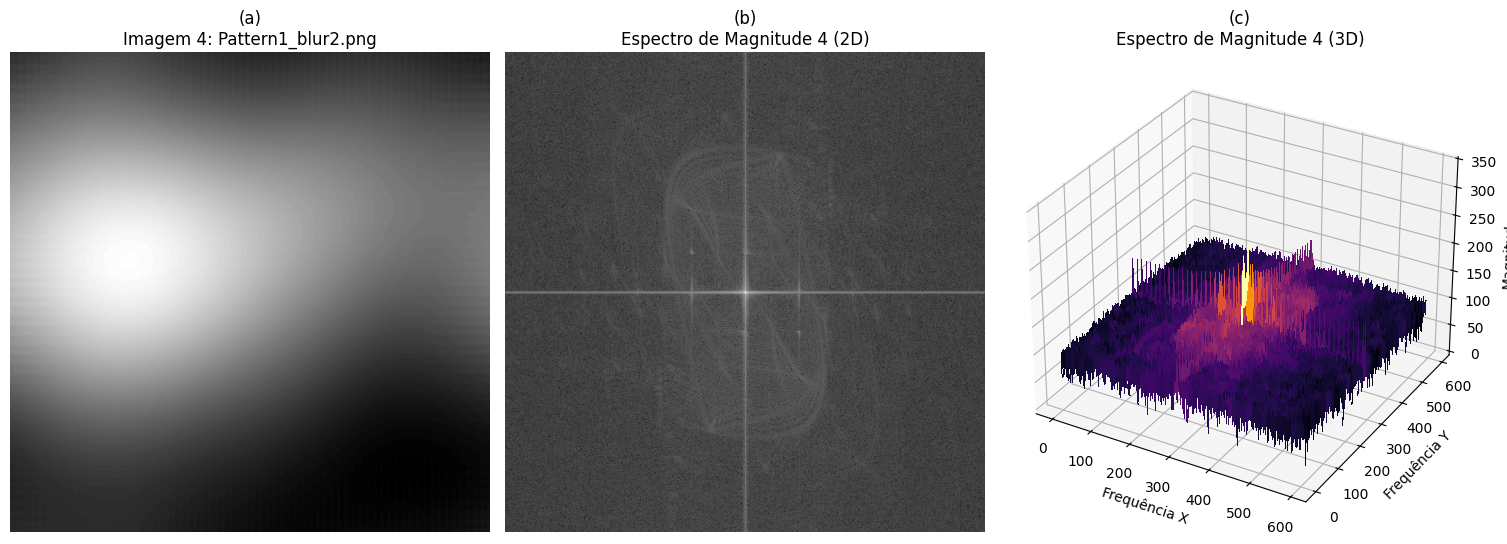

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Lista de imagens
imagens = [
    'imgs\\Q1\\Pattern1.png',
    'imgs\\Q1\\Pattern2.png',
    'imgs\\Q1\\Pattern1_blur.png',
    'imgs\\Q1\\Pattern1_blur2.png'
]

# Loop para processar cada imagem
for i, caminho_imagem in enumerate(imagens, 1):
    # Carregar a imagem em escala de cinza
    img = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    nome_arquivo = os.path.basename(caminho_imagem)

    # Transformada de Fourier e espectro de magnitude
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(1 + np.abs(dft_shift))

    # Criar subplots: imagem original, espectro 2D e espectro 3D
    fig = plt.figure(figsize=(15, 8))

    # Imagem original
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(img, cmap='gray')
    ax1.set_title(f'(a)\nImagem {i}: {nome_arquivo}')
    ax1.axis('off')

    # Espectro de magnitude 2D
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(magnitude_spectrum, cmap='gray')
    ax2.set_title(f'(b)\nEspectro de Magnitude {i} (2D)')
    ax2.axis('off')

    # Espectro de magnitude 3D
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    X = np.arange(magnitude_spectrum.shape[1])
    Y = np.arange(magnitude_spectrum.shape[0])
    X, Y = np.meshgrid(X, Y)
    Z = magnitude_spectrum
    ax3.plot_surface(X, Y, Z, cmap='inferno', linewidth=0, antialiased=False)
    ax3.set_title(f'(c)\nEspectro de Magnitude {i} (3D)')
    ax3.set_xlabel('Frequência X')
    ax3.set_ylabel('Frequência Y')
    ax3.set_zlabel('Magnitude')

    plt.tight_layout()
    plt.show()